In [1]:
import os

os.environ["CONFIG_PATH"] = "/home/locnt7"

os.environ["SPARK_SERVER"] = "SPARK@95"

In [2]:
import datetime as dt
import gc
import pandas as pd
import seaborn as sns
import scipy
import scipy.stats as st
from pdp.core import hdfs_utils, spark_utils
from pyspark.sql import functions as F
from pyspark.sql import types as T
from pyspark.sql.window import Window
from typing import List
import numpy as np
from datetime import timedelta,datetime,date
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,f1_score,precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
%matplotlib inline
import sys
sys.path.append('/home/locnt7/interview/')

In [3]:
from pdp.core import spark_utils,hdfs_utils
from pyspark.sql import functions as F

import datetime as dt
NO_CORES=20
spark = spark_utils.get_spark_session(
    app_name="eval recommendation",
    cores=NO_CORES,
    driver_memory=32,
    executor_memory=32,
    ui_port=9696,
    log_level="ERROR",
)

22/11/21 22:56:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/11/21 22:56:27 WARN Utils: Service 'SparkUI' could not bind on port 9696. Attempting port 9697.
22/11/21 22:56:27 WARN Utils: Service 'SparkUI' could not bind on port 9697. Attempting port 9698.


Spark Master: spark://10.60.37.95:7077
UI Web:       http://10.60.37.95:9698
Version:      3.1.2
App Name:     EVAL RECOMMENDATION


In [4]:
df_=pd.read_csv('/home/locnt7/files/df_final.csv')\
    .assign(timestamp=lambda x:x.timestamp.apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S')))

In [5]:
df_.iloc[0]

trans_id                         5952133
item_id                           434679
user_id                           298515
amount                                18
cost                                3.52
description    mousey long legs soft toy
timestamp            2018-03-27 10:24:00
Name: 0, dtype: object

In [5]:
df_item=pd.read_csv('files/data_item_vnpay.csv')

In [7]:
df_['timestamp'].max()

Timestamp('2019-02-20 08:50:00')

In [6]:
from recommender.Recommender import Recommender

In [7]:
recommender=Recommender(spark=spark)

In [8]:
recommender.fit(df_)

In [9]:
recommender._init_recommendation(data_item=df_item,dt=datetime(2019,2,1))

load


In [12]:
recommender.recommend_batch([1])

,user_id,segment,recommendation
0,1,new,"[470883, 1787583, 1787079, 998886, 1782459, 47..."


In [13]:

recommender.recommend_batch([259287,1,259539,296688],)

/home/locnt7/interview/recommender/Recommender.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_users['recommendation']=new_users.apply(lambda _:most_frequent_item,axis=1)


,user_id,segment,recommendation
1,1,new,"[470883, 1787583, 1787079, 998886, 1782459, 47..."
0,296688,warm,"[471870, 1787583, 464898, 455049, 480795, 4461..."
0,259287,old,"[476637, 486570, 486591, 486612, 486633, 48665..."
1,259539,old,"[471009, 482181, 470883, 464520, 486591, 48648..."


In [14]:
datetime(2022,1,1).date()

datetime.date(2022, 1, 1)

In [15]:
df_spark=spark.createDataFrame(df_)

In [16]:
df__=df_spark.withColumn('date',F.to_date('timestamp')).toPandas()

In [17]:
dt=datetime(2019,1,1)
dt_end=datetime(2019,2,20)


In [18]:
while dt<dt_end:
    data=df__.loc[lambda x: x.timestamp<]

SyntaxError: invalid syntax (1446386700.py, line 2)

In [19]:
dt=datetime(2019,1,1)

In [11]:
data_=df_.loc[lambda x:x.timestamp<dt]

TypeError: Invalid comparison between dtype=datetime64[ns] and module

In [21]:
recommender_=Recommender(spark=spark)
recommender_.fit(data_)
recommender_._init_recommendation(data_item=df_item,dt=dt)

In [22]:
truth_=df_.loc[lambda x:(dt<=x.timestamp)&(x.timestamp<dt+timedelta(1))]

In [23]:
user_pred=list(set(truth_.sort_values('timestamp')['user_id']))

In [26]:
pred_tomorrow=recommender.recommend_batch(user_pred,n_recommends=30)

In [30]:
61/2000

0.0305

In [29]:
truth_

,trans_id,item_id,user_id,amount,cost,description,timestamp
448,6292638,482769,383292,6,4.490000,set 2 pantry design tea towels,2019-01-01 08:43:00
794,6293133,340977,368991,3,0.290000,sleeping cat erasers,2019-01-01 11:57:00
1314,6293034,460488,365820,30,2.811236,jumbo bag scandinavian blue paisley,2019-01-01 10:52:00
1380,6293056,460488,353073,9,2.811236,jumbo bag scandinavian blue paisley,2019-01-01 11:20:00
1564,6292737,460488,338079,30,2.811236,jumbo bag scandinavian blue paisley,2019-01-01 09:13:00
...,...,...,...,...,...,...,...
360358,6292550,482790,364266,3,6.840000,cotton apron pantry design,2019-01-01 08:23:00
360459,6292539,487767,362103,72,1.730000,filigree heart butterfly white,2019-01-01 08:21:00
360537,6292671,491232,261954,36,2.880000,spaceboy rocket lolly makers,2019-01-01 08:53:00
360557,6292253,491232,373044,3,2.880000,spaceboy rocket lolly makers,2019-01-01 07:03:00


In [27]:
pred_tomorrow.merge(truth_,how='inner',on='user_id')\
    .assign(is_correct=lambda x: x.apply(lambda x:x.item_id in x.recommendation,axis=1))\
        .loc[lambda x:x.is_correct==True]

,user_id,recommendation,segment,trans_id,item_id,amount,cost,description,timestamp,is_correct
651,341964,"[490728, 494949, 490665, 485100, 493584, 47365...",warm,6292814,475041,12,2.280000,traditional knitting nancy,2019-01-01 09:54:00,True
662,341964,"[490728, 494949, 490665, 485100, 493584, 47365...",warm,6292814,459711,6,1.931676,traditional wooden skipping rope,2019-01-01 09:54:00,True
674,341964,"[490728, 494949, 490665, 485100, 493584, 47365...",warm,6292814,481110,6,4.080000,paper chain kit vintage christmas,2019-01-01 09:54:00,True
688,341964,"[490728, 494949, 490665, 485100, 493584, 47365...",warm,6292814,477246,3,5.180000,alarm clock bakelike green,2019-01-01 09:54:00,True
742,318339,"[1665741, 487368, 1787079, 487221, 470064, 470...",old,6292726,1665741,72,7.346296,chilli lights,2019-01-01 09:07:00,True
...,...,...,...,...,...,...,...,...,...,...
1987,364665,"[482244, 472269, 443562, 473949, 487032, 48104...",old,6292407,473949,18,5.180000,feltcraft cushion butterfly,2019-01-01 08:07:00,True
2003,364665,"[482244, 472269, 443562, 473949, 487032, 48104...",old,6292407,487032,18,2.280000,bundle of 3 alphabet exercise books,2019-01-01 08:07:00,True
2022,312186,"[477162, 477477, 481110, 481950, 481992, 48108...",old,6292341,481992,432,0.760000,60 cake cases vintage christmas 72,2019-01-01 07:53:00,True
2039,278523,"[486066, 487326, 477225, 477246, 477267, 47728...",old,6292803,1732374,9,4.080000,wooden frame antique white,2019-01-01 09:46:00,True


In [32]:
df_res=pred_tomorrow.merge(truth_,how='inner',on='user_id')

In [33]:
df_res

,user_id,recommendation,segment,trans_id,item_id,amount,cost,description,timestamp
0,291837,"[490371, 463806, 489678, 481992, 477519, 47745...",warm,6292946,477477,30,2.280000,ribbon reel christmas present,2019-01-01 10:30:00
1,291837,"[490371, 463806, 489678, 481992, 477519, 47745...",warm,6292946,490329,36,1.730000,roll wrap vintage christmas,2019-01-01 10:30:00
2,291837,"[490371, 463806, 489678, 481992, 477519, 47745...",warm,6292946,490896,72,0.540000,pack of 12 vintage christmas tissue,2019-01-01 10:30:00
3,291837,"[490371, 463806, 489678, 481992, 477519, 47745...",warm,6292946,485751,12,5.730000,miseltoe heart wreath white mistletoe cream,2019-01-01 10:30:00
4,291837,"[490371, 463806, 489678, 481992, 477519, 47745...",warm,6292946,477372,54,1.730000,3d vintage christmas stickers,2019-01-01 10:30:00
...,...,...,...,...,...,...,...,...,...
2059,278523,"[486066, 487326, 477225, 477246, 477267, 47728...",old,6292803,489741,6,2.280000,small white heart of wicker,2019-01-01 09:46:00
2060,298494,"[470883, 476637, 477120, 482349, 476679, 46651...",old,6292352,470358,36,0.882078,magnets pack of 4 swallows,2019-01-01 07:54:00
2061,298494,"[470883, 476637, 477120, 482349, 476679, 46651...",old,6292352,474432,12,5.180000,cardholder holly wreath metal,2019-01-01 07:54:00
2062,298494,"[470883, 476637, 477120, 482349, 476679, 46651...",old,6292352,489678,18,3.440000,box of 6 mini vintage crackers,2019-01-01 07:54:00


Run dt

In [16]:
ls_dt=[]
ls_correct=[]
ls_pool=[]
dt=datetime(2019,1,1)
dt_end=datetime(2019,2,28)

In [26]:
while dt<dt_end:
    data_=df_.loc[lambda x:x.timestamp<dt]
    recommender_=Recommender(spark=spark)
    recommender_.fit(data_)
    recommender_._init_recommendation(data_item=df_item,dt=dt)
    truth_=df_.loc[lambda x:(dt<=x.timestamp)&(x.timestamp<dt+timedelta(1))]
    user_pred=list(set(truth_.sort_values('timestamp')['user_id']))
    if len(user_pred)==0: 
        dt+=timedelta(1) 
        continue
    pred_tomorrow=recommender.recommend_batch(user_pred,n_recommends=10)
    
    df_correct=pred_tomorrow.merge(truth_,how='inner',on='user_id')\
    .assign(is_correct=lambda x: x.apply(lambda x:x.item_id in x.recommendation,axis=1))\
        .loc[lambda x:x.is_correct==True]
    
    ls_dt.append(dt)
    ls_correct.append(len(df_correct))
    ls_pool.append(len(truth_))
    dt+=timedelta(1)

load
load


load


load


load


load


load


load
load


load


load


load


load


load


load
load


load


load


load


load


load


load
load


load


load


load


load


KeyboardInterrupt: 

In [32]:
df_res=pd.DataFrame(
    {
        'dt':ls_dt,
        'correct':ls_correct,
        'pool':ls_pool
    }
).assign(acc=lambda x:x.correct/x.pool)

Text(0.5, 0, 'Date')

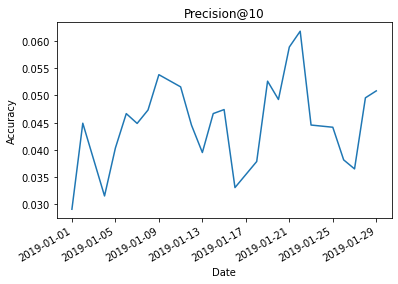

In [39]:
df_res.set_index('dt').sort_index()['acc'].plot()
plt.title('Precision@10')
plt.ylabel('Accuracy')
plt.xlabel('Date')